In [1]:
!pip install sqlalchemy
!pip install pymysql
!pip install mysql.connector-python
!pip install matplotlib

In [2]:
import os
import pymysql
import mysql.connector
from sqlalchemy import create_engine

import pandas as pd
import matplotlib.pyplot as plt

In [11]:
import sqlite3

# 1. Set up the Database

# Create or connect to an SQLite database
connection = sqlite3.connect('student_grades.db.')

# Create a cursor object
cursor = connection.cursor()

In [15]:
# 2. Create the Necessary Tables

# Students Table

cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT,
    revenue INTEGER
)
''')



# Grades Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER REFERENCES students(student_id),
    subject TEXT,
    grade INT
      
)
''')

In [17]:
# 3. Insert Data Into the Tables

stud_data = [
    (1, 'Alice', 'Johnson'), # oh that's a handy way to do it. that's nice. 
    (2, 'Bob', 'Smith'),
    (3, 'Carol', 'White'),
    (4, 'David', 'Brown'),
    (5, 'Eve', 'David')
]

grade_data = [
    (1, 1, 'Math', 95), # oh that's a handy way to do it. that's nice. 
    (2, 1, 'English', 88),
    (3, 1, 'History', 90),
    (4, 2, 'Math', 82),
    (5, 2, 'English', 76),
    (6, 2, 'History', 85), 
    (7, 3, 'Math', 84),
    (8, 3, 'English', 93),
    (9, 3, 'History', 80), 
    (10, 5, 'Math', 93),
    (11, 5, 'English', 68),
    (12, 5, 'History', 89), 
    (13, 4, 'Math', 92),
    (14, 4, 'English', 80),
    (15, 4, 'History', 95)
    
]


# Insert data into the table
cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name) VALUES (?, ?, ?)
''', stud_data) #executemany is to just let u have a data type with a lot of stuff in it. instead of a for loop. i guess.

# Commit the transaction
connection.commit()

cursor.executemany('''
INSERT INTO grades (grade_id, student_id, subject, grade) VALUES (?, ?, ?, ?)
''', grade_data)

connection.commit()

In [21]:
# Perform SQL Queries
'''
1. Retrieve all students' names and their grades.
2. Find the average grade for each student.
3. Find the student with the highest average grade.
4. Find the average grade for the Math subject.
5. List all students who scored above 90 in any subject.
'''
#1. Retrieve all students' names and their grades.

#first join the tables
cursor.execute('''
SELECT students.first_name, students.last_name, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

# Fetch and display the results
joined_data = cursor.fetchall()

for row in joined_data:
    print(row)
    

('Alice', 'Johnson', 95)
('Alice', 'Johnson', 88)
('Alice', 'Johnson', 90)
('Bob', 'Smith', 82)
('Bob', 'Smith', 76)
('Bob', 'Smith', 85)
('Carol', 'White', 84)
('Carol', 'White', 93)
('Carol', 'White', 80)
('Eve', 'David', 93)
('Eve', 'David', 68)
('Eve', 'David', 89)
('David', 'Brown', 92)
('David', 'Brown', 80)
('David', 'Brown', 95)


In [23]:
#2. Find the average grade for each student. wait no u can just pick the max out of the selected wjen you print. i am so smart ahaha
cursor.execute('''
SELECT students.student_id, students.first_name, students.last_name, AVG(grades.grade)
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')
avg_data = cursor.fetchall()
for row in avg_data:
    print(row)

(1, 'Alice', 'Johnson', 91.0)
(2, 'Bob', 'Smith', 81.0)
(3, 'Carol', 'White', 85.66666666666667)
(4, 'David', 'Brown', 89.0)
(5, 'Eve', 'David', 83.33333333333333)


In [33]:
#3. Find student with highest average grade
cursor.execute('''
SELECT  students.first_name, students.last_name, AVG(grades.grade)
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id ORDER BY grades.grade DESC
''')
avg_order_data = cursor.fetchall()

print(avg_order_data[0])

('Alice', 'Johnson', 91.0)


In [ ]:
#4. average math grade
cursor.execute('''
SELECT AVG(grade) FROM grades WHERE subject = "Math" 
''')

In [ ]:
avg_math = cursor.fetchone()
print(avg_math)

#5. all students who score above 90
for row in joined_data:
    if (row[2] > 90):
        print(row[0], row[1])

    

In [31]:
import pandas as pd

stud_df = pd.read_sql_query('SELECT * FROM students', connection)

grade_df = pd.read_sql_query('SELECT * FROM grades', connection)

# Display the first few rows of the DataFrame
print(stud_df.head())

print(grade_df.head())

'''
Load Data into Pandas
1. Use Pandas to load the data from the students and grades tables into DataFrames.
2. Use JOIN queries to combine the data from both tables into a single DataFrame that
includes each student's name, subject, and grade.
3. Visualize the data with Matplotlib:
o Plot the average grades for each student.
o Create a bar chart showing the average grade for each subject
'''



   student_id first_name last_name revenue
0           1      Alice   Johnson    None
1           2        Bob     Smith    None
2           3      Carol     White    None
3           4      David     Brown    None
4           5        Eve     David    None
   grade_id  student_id  subject  grade
0         1           1     Math     95
1         2           1  English     88
2         3           1  History     90
3         4           2     Math     82
4         5           2  English     76


"\nLoad Data into Pandas\n1. Use Pandas to load the data from the students and grades tables into DataFrames.\n2. Use JOIN queries to combine the data from both tables into a single DataFrame that\nincludes each student's name, subject, and grade.\n3. Visualize the data with Matplotlib:\no Plot the average grades for each student.\no Create a bar chart showing the average grade for each subject\n"

In [35]:
# 2. Use JOIN queries to combine the data from both tables into a single DataFrame that
# includes each student's name, subject, and grade.

join_df = pd.read_sql_query('''
SELECT students.first_name, students.last_name, grades.subject,grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''', connection)
print(join_df.head())


  first_name last_name  subject  grade
0      Alice   Johnson     Math     95
1      Alice   Johnson  English     88
2      Alice   Johnson  History     90
3        Bob     Smith     Math     82
4        Bob     Smith  English     76


/var/folders/xq/7shpf5614kb7rbv9g75mkym00000gn/T/ipykernel_7312/3886932083.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f1.show()
/var/folders/xq/7shpf5614kb7rbv9g75mkym00000gn/T/ipykernel_7312/3886932083.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f2.show()


<Figure size 640x480 with 0 Axes>

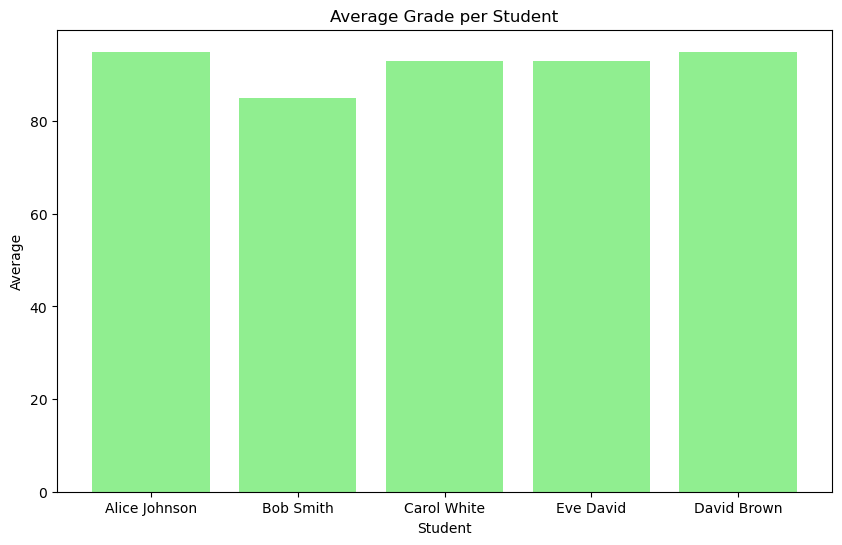

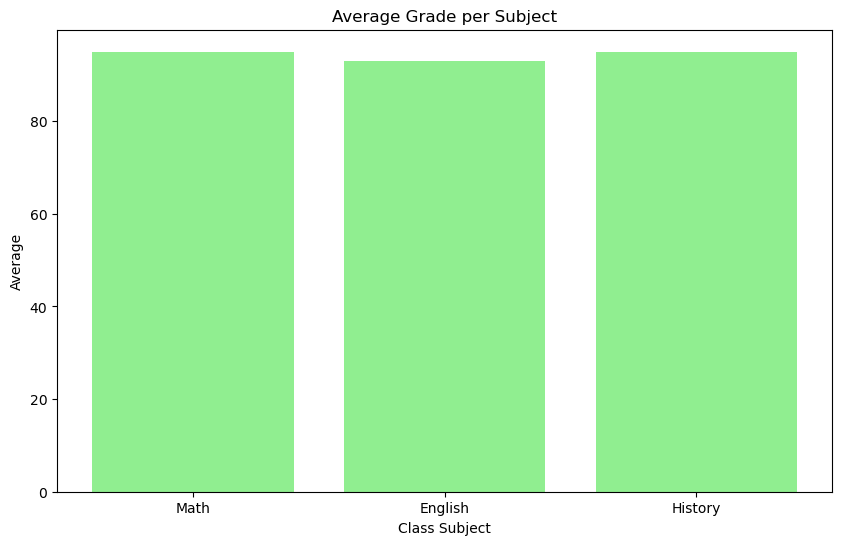

In [49]:
''' 3. Visualize the data with Matplotlib:
        o Plot the average grades for each student.
        o Create a bar chart showing the average grade for each subject
'''

import matplotlib.pyplot as plt

# Plot the average grades for each student.
join_df['name'] = join_df['first_name'] + " " + join_df['last_name']

f1 = plt.figure(1)
plt.figure(figsize=(10,6))
plt.bar(join_df['name'], join_df['grade'], color='lightgreen')
plt.xlabel('Student')
plt.ylabel('Average')
plt.title('Average Grade per Student')
f1.show()
# Plot sales data

f2 = plt.figure(2)
plt.figure(figsize=(10,6))
plt.bar(join_df['subject'], join_df['grade'], color='lightgreen')
plt.xlabel('Class Subject')
plt.ylabel('Average')
plt.title('Average Grade per Subject')
f2.show()



In [51]:
# DON'T FORGET TO CLOSE THE CURSOR!!
cursor.close()